# Part 1 
## Getting the data ready

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
import sklearn

### we have three main things to do : 
* 1) Split the data into features and labels( usually `X` and `y`)
* 2) Filling (also called imputing) or disregrading missing values
* 3) Converting non-numerical values to numerical values (also called feature encoding) 

In [3]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# rember that in pandas axis = 1 means the columns axis
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [7]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((242,), (61,), (242, 13), (61, 13))

### make sure it's all numerical

In [2]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [3]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [3]:
# split the data
from sklearn.model_selection import train_test_split
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
#Turn all categories into numbers
# how you can determine a category
car_sales["Doors"].value_counts()
# look at the output carefully, we can categorize our data based on the number of doors

4    856
5     79
3     65
Name: Doors, dtype: int64

In [5]:
# simillarly we can iterate this process for "Make" and "Colour" column also
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [8]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [9]:
# pandas alternative for OneHotEncoder
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [12]:
# Build the machine learning model
# RandomForestRegressor can predict a number
# Where RandomForestClassifier was used to predict a class
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.36128751150877425

## What if there are missing values
* Fill them with some value (also known as imputation)
* Remove the samples with missing data together

In [2]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
# this will show how many missing values there are
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [6]:
# you will also face an error if you try to do feature encoding if your data set contains missing values
from sklearn.model_selection import train_test_split
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: Input contains NaN

#### we already know how to do that with pandas.Now we will focus on doing that same thing using scikit-learn

In [7]:
# first get rid of all the rows of our target column( which we are trying to predict ) where NaN values exist
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [8]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]
X.shape, y.shape

((950, 4), (950,))

In [14]:
# actual imputing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill the categorical values with missing and numerical values with mean
cat_features = ["Make", "Colour"]
num_features = ["Odometer (KM)"]
door_feature = ["Doors"]
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
num_imputer = SimpleImputer(strategy="mean")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
# create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("num_imputer", num_imputer, num_features),
    ("door_imputer", door_imputer, door_feature)
])
# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [15]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Odometer (KM)", "Doors"])
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [12]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [17]:
car_sales_filled[6:9]

,Make,Colour,Odometer (KM),Doors
6,Toyota,Blue,163453,4
7,Honda,White,130987,4
8,missing,White,130538,4


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25123430311687134

# Part 2
## Choosing the right estimator/algorithm for our problem

* Classification: It means whether a sample is of one thing or another
* Regression: Predicting a number
* Step 1 : Choose the Scikit learn choose the right estimator map

In [4]:
# import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
# extract the datas and convert into a pandas DataFrame
boston_df = pd.DataFrame(boston["data"], columns= boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# how many samples?
len(boston_df)

506

In [10]:
# Let's try the ridge regression model
from sklearn.linear_model import Ridge
# Set up random seed
np.random.seed(42)
#Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

#Check score of the model
model.score(X_test, y_test)

0.6662221670168519

How to improve the model
what if Ridge model isn't working according to our expectation

* let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [6]:
# Let's try the ridge regression model
from sklearn.ensemble import RandomForestRegressor
# Set up random seed
np.random.seed(42)
#Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Ridge model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#Check score of the model
model.score(X_test, y_test)

0.873969014117403

Follow along with the map untill you get your desired score
<img src = "images/ml_map.png"/>

trying out another one (the heart_disease dataset)

In [14]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# split the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.svm import LinearSVC
np.random.seed(42)
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5573770491803278

* hmm...the result is not satisfactory

In [21]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8688524590163934

### So,
* if the data is structured use ensemble methods
* if the data is unstructured use deep learning or transfer learning

# Part 3
### fit the model/algorithm on our data and use it to make predictions
Diffrent names for
* X = features/ feature variables/ data
* y = labels/ target/ target variables

In [8]:
heart_disease = pd.read_csv("data/heart-disease.csv")
# split the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
model = RandomForestClassifier(n_estimators=100)
# train our model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7704918032786885

* Make predictions using our model
2 ways to predict
  - predict()
  - predict_proba()

In [14]:
np.array(y_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [9]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [12]:
# Compare predictions to truth labelsto evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.7704918032786885

In [15]:
# the Sci-kit learn way of doing the prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.7704918032786885

* Make predictions with predict_proba()
  - predict_proba() return the probabilities for a classification label

In [16]:
# it returns the probabilty as an array
model.predict_proba(X_test[:5])

array([[0.81, 0.19],
       [0.99, 0.01],
       [0.61, 0.39],
       [0.01, 0.99],
       [0.17, 0.83]])

In [18]:
np.array(y_test[:5])

array([0, 0, 1, 1, 1])

In [20]:
y_preds[:5]

array([0, 0, 0, 1, 1])

trying out predict for regression

In [23]:
# Let's try the ridge regression model
from sklearn.ensemble import RandomForestRegressor
# Set up random seed
np.random.seed(42)
#Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Ridge model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#Check score of the model
model.score(X_test, y_test)

0.873969014117403

In [28]:
y_preds = model.predict(X_test)

In [30]:
# compare predictions with the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
# it means that on average the predicted value is 2.122 point more or less than the actual value

2.1226372549019623

# Part 4
### Evaluating our model
* it's basically the model.score() method
  - for regression problem it returns the coefficient of determination
  - for classification problem it returns the mean accuracy

In [3]:
heart_disease = pd.read_csv("data/heart-disease.csv")
# split the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100)
# train our model
clf.fit(X_train, y_train)
# evaluating
clf.score(X_test, y_test)

0.7868852459016393

* what cross-val-score does
<img src = "images/cross_val_score.png"/>

In [34]:
# cross-val-score
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv = 5)

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.78333333])

In [37]:
# caomparing
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))
clf_single_score, clf_cross_val_score

(0.819672131147541, 0.8248087431693989)

In [39]:
# default scroring parameter for classification  = mean accuracy
np.random.seed(42)
cross_val_score(clf, X, y, cv = 5, scoring = None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

*** Accuracy ***

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")
# split the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100)
# train our model
clf.fit(X_train, y_train)
# evaluating
# cross-val-score
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv = 5)
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100 : .2f}%")

Heart Disease Classifier Cross-Validated Accuracy :  82.15%


*** Area Under Receiver Operating Characteristic (ROC) curve ***
    (Also known as-
      - Area Under Curve - AUC)
 * ROC curves are a comparison of model's true positive rate(tpr) versus model
 's false positive rate(fpr)
   - True Positive : predicts 1 while truth is 1
   - True Negative : predicts 0 while truth is 0
   - False positive: predicts 1 while truth is 0
   - False negative: predicts 0 while truth is 1        

In [43]:
# for our heart disease data
y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.83, 0.17],
       [0.64, 0.36],
       [0.62, 0.38],
       [0.94, 0.06],
       [0.25, 0.75]])

In [44]:
# we have to collect all the possibilities for 1 only
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.17, 0.36, 0.38, 0.06, 0.75])

In [47]:
from sklearn.metrics import roc_curve
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive) 

#check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.06896552, 0.06896552, 0.10344828, 0.17241379,
       0.20689655, 0.20689655, 0.31034483, 0.31034483, 0.37931034,
       0.4137931 , 0.4137931 , 0.5862069 , 0.62068966, 0.62068966,
       0.65517241, 0.72413793, 0.93103448, 1.        ])

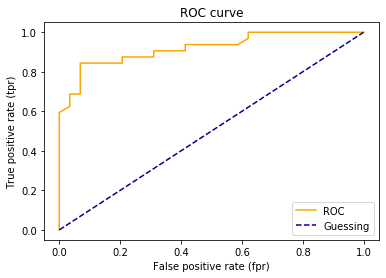

In [52]:
# create a function for plotting the curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # plot line with no predective power(baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)       

In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9191810344827586

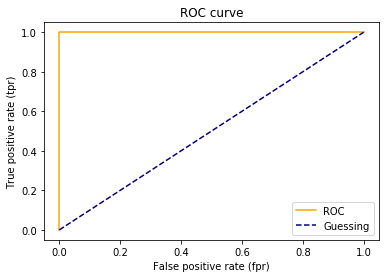

In [54]:
# plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

**Confusion Matrix**:
A confusion matrix is a quick way to compare the labels, a machine predicts between the labels, it supposed to predict.
In essense, giving you an idea where the model is getting confused

In [3]:
from sklearn.metrics import confusion_matrix
# for our heart disease dataset
np.random.seed(42)
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[22,  8],
       [ 4, 27]])

<img src = "images/confusion_matrix.png"/>

In [6]:
# visualixe confusin matrix with pd.crosstab
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,3,29


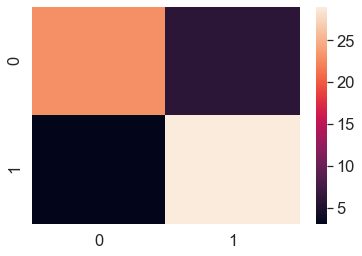

In [7]:
# make our confusion matrix more visible with seaborn
import seaborn as sns
# set the font scale
sns.set(font_scale=1.5)
#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
# plot using seaborn
sns.heatmap(conf_mat)

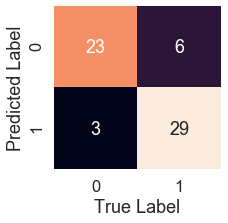

In [11]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True,#Annotate the boxes with conf_mat info
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    # Even though the issue is not appearing here but sometimes annotation labels are cut off
    # to fix that do this
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
plot_conf_mat(conf_mat)                     

* Classification Report
<img src = "images/classification_report.png"/>

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



<img src = "images/classfication_matrix_summary.png"/>

* Evaluating a classification report
  - R^2 (pronounced as r-squared) or co -efficient of determination
  - Mean Absolute error(MAE)
  - Mean Squared Error (MSE)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = boston["target"]

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
np.random.seed(42)
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
np.random.seed(42)
model.score(X_test, y_test)

0.873969014117403

In [18]:
from sklearn.metrics import r2_score
# fill an array with the mean of y_test
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:5]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [21]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [22]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

2.1226372549019623

In [23]:
df = pd.DataFrame(data = {
    "actual_values": y_test,
    "predicted_values" : y_preds
})
df["differences"] = df["predicted_values"] - df["actual_values"]

In [24]:
df

,actual_values,predicted_values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


* Mean squared error

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_preds, y_test)

9.242328990196082

In [26]:
# calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.24232899019608

<img src = "images/which_regression_matric.png"/>

Finally using the `scoring` parameter

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease = pd.read_csv("data/heart-disease.csv")
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [8]:
clf = RandomForestClassifier(n_estimators=100)
cv_acc = cross_val_score(clf, X,y,cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [10]:
# cross validated accuracy
print(f"Cross Validated accuracy is : {np.mean(cv_acc)*100: .2f}%")

Cross Validated accuracy is :  82.48%


In [12]:
# by default scring is set to None
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y,cv = 5, scoring=None)
print(f"Cross Validated accuracy is : {np.mean(cv_acc)*100: .2f}%")

Cross Validated accuracy is :  82.48%


In [14]:
# recall
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y,cv = 5, scoring="recall")
print(f"Cross Validated accuracy is : {np.mean(cv_acc)*100: .2f}%")

Cross Validated accuracy is :  85.45%


In [15]:
# Precision
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y,cv = 5, scoring="precision")
print(f"Cross Validated accuracy is : {np.mean(cv_acc)*100: .2f}%")

Cross Validated accuracy is :  83.30%


In [16]:
# f1
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y,cv = 5, scoring="f1")
print(f"Cross Validated accuracy is : {np.mean(cv_acc)*100: .2f}%")

Cross Validated accuracy is :  84.27%


* doing the same thing for Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]
model = RandomForestRegressor(n_estimators=100)

In [20]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = None)
cv_r2.mean()

0.622375083951403

In [22]:
# r2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = "r2")
cv_r2.mean()

0.622375083951403

In [23]:
# MAE
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = "neg_mean_absolute_error")
cv_r2.mean()

-3.0314302853814783

In [24]:
# MSE
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = "neg_mean_squared_error")
cv_r2.mean()

-21.283214366686064

#### wrap up
* Classifier evaluation functions

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
model = RandomForestClassifier(n_estimators= 100)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
# Evaluate the classifier
print("Classifier metrics on test set : ")
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"F1 score : {f1_score(y_test, y_preds)}")

Classifier metrics on test set : 
Accuracy : 85.25%
Recall : 0.875
Precision : 0.8484848484848485
F1 score : 0.8615384615384615


* Regression Evaluation function

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
model = RandomForestRegressor(n_estimators= 100)
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
# Evaluate the classifier
print("Regression metrics on test set : ")
print(f"R^2 score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set : 
R^2 score : 0.8739690141174031
MAE : 2.1226372549019623
MSE : 9.242328990196082


# Part 5
### Improving our model

* first_prediction = baseline prediction
* first_model = baseline model
* From a data perspective
  - Could we collect more data
  - Could we improve our data
* From a model perspective
  - Could we use a better model?
  - Could we improve our model  
* Parameters = model find the pattern in data \n
* HyperParameters = settings on a model you can adjust to improve its performance  


In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators= 100)
# getting all the hyper parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters-
* By hand
* Randomly by RandomSearchCV
* Exhaustively by GridSearchCV 

* 5.1) By hand
<img src = "images/hyper_by_hand.png"/>

* We are going to adjust
  - `min_samples_split`
  - `min_samples_leaf`
  - `n_estimators`
  - `max_depth`
  - `max_features`

In [38]:
def evaluate_preds(y_true, y_preds):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    """
    Performs evaluation comparison on y_true 
    labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
    "precision": round(precision, 2),
    "recall": round(recall,2),
    "f1": round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    return metric_dict

In [36]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
#  shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)
# split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]
# split the data into train, valid and test set
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of our data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of our data range
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [37]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
#nake baseline predictions
y_preds = clf.predict(X_valid)

# evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall : 0.88
F1 score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [40]:
#improving by setting the n_estimators
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#nake baseline predictions
y_preds = clf.predict(X_valid)

# evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.84
Recall : 0.84
F1 score : 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [41]:
#improving by setting the n_estimators
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(X_train, y_train)
#nake baseline predictions
y_preds = clf.predict(X_valid)

# evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.81
Recall : 0.84
F1 score : 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

tuning hyper parameters using Randomized search cv

In [47]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
grid = {
    "n_estimators" : [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features" : ["auto", "sqrt"],
    "min_samples_split" : [2, 4, 6],
    "min_samples_leaf" : [1, 2, 4]
}
np.random.seed(42)
# split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#instantiate random forest classifier
clf = RandomForestClassifier(n_jobs=1)
#set up RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv = 5,
                            verbose=2)

In [48]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samp

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [49]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [56]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall : 0.86
F1 score : 0.81


### tuning hyperparameters using grid search cv
grid = {
    "n_estimators" : [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features" : ["auto", "sqrt"],
    "min_samples_split" : [2, 4, 6],
    "min_samples_leaf" : [1, 2, 4]
}
* Warning: number of iter. : multiplication of all the number of paramaters * iter. * fold
 - here it will be : 6*5*2*3*3*10*5 (takes a lot of computing power)


In [52]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
grid_2 = {
    "n_estimators" : [ 100, 200, 500],
    "max_depth": [None],
    "max_features" : ["auto", "sqrt"],
    "min_samples_split" : [6],
    "min_samples_leaf" : [1, 2]
}
np.random.seed(42)
# split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#instantiate random forest classifier
clf = RandomForestClassifier(n_jobs=1)
#set up RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid = grid_2,
                      cv = 5,
                      verbose=2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto,

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [53]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [54]:
gs_y_preds = gs_clf.predict(X_test)

In [55]:
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall : 0.82
F1 score : 0.78


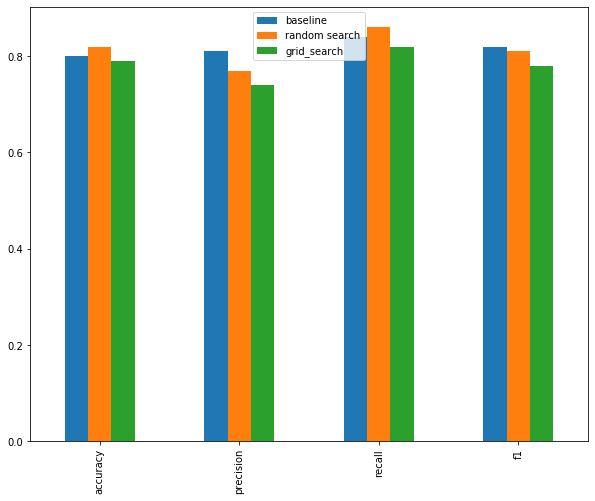

In [57]:
compare_metrics = pd.DataFrame({
    "baseline" : baseline_metrics,
    "random search" :rs_metrics,
    "grid_search" : gs_metrics
})
compare_metrics.plot.bar(figsize = (10, 8))

# Part 6
### Saving and loading our model 

* using `pickle`

In [59]:
import pickle
gs_fig = pickle.dump(gs_clf, open("grid_search_cv_model.pkl", "wb"))

In [60]:
loaded_pickle_model = pickle.load(open("grid_search_cv_model.pkl", "rb"))

In [62]:
loaded_pickle_model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

* usng joblib

In [64]:
from joblib import dump, load
# Save model to file
dump(gs_clf, filename="grid_search_cv_model.joblib")

['grid_search_cv_model.joblib']

In [65]:
loaded_model = load(filename="grid_search_cv_model.joblib")

In [66]:
loaded_model.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])